<a href="https://colab.research.google.com/github/Ivlf/Ivana/blob/main/copy_of_project_3_data_201_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3**

### 1. Introduction: Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows

###### This dataset includes information about gun-death in the US in the years 2012-2014. The data includes data regarding the victim's age, sex, race, education, intent, time (month and year) and place of death, and whether or not police was at the place of death.
###### Reference Source: https://www.kaggle.com/datasets/hakabuk/gun-deaths-in-the-us

### 2. Prepare and wrangle your data with Pandas and Numpy

######According to geeksforgeeks.org, Data Wrangling is difined "Data Wrangling is the process of gathering, collecting, and transforming Raw data into another format for better understanding, decision-making, accessing, and analysis in less time." It deals with data exploration, dealing with missing values, reshaping data, filtering dat, and etc.
######Reference Source:https://www.geeksforgeeks.org/data-wrangling-in-python/

In [ ]:
# Import pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set up graphics
plt.style.use('classic')
%matplotlib inline

##### Data Exploration

In [ ]:
#Import a dataset, display data and check the summary of the data, how it looks like, the size of data, etc.
df = pd.read_csv ('guns.csv')
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


In [ ]:
df.describe()

,Unnamed: 0,year,month,police,age,hispanic,education
count,100798.000000,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000,100745.000000
mean,50399.500000,2013.000357,6.567601,0.013909,43.857601,114.179607,2.296352
std,29098.020554,0.816278,3.405609,0.117114,19.496181,61.595734,0.990105
min,1.000000,2012.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,25200.250000,2012.000000,4.000000,0.000000,27.000000,100.000000,2.000000
50%,50399.500000,2013.000000,7.000000,0.000000,42.000000,100.000000,2.000000
75%,75598.750000,2014.000000,9.000000,0.000000,58.000000,100.000000,3.000000
max,100798.000000,2014.000000,12.000000,1.000000,107.000000,998.000000,5.000000


In [ ]:
df.shape

(100798, 11)

##### Check the data types of each of the columns and see how many null values exist in the data.

In [ ]:
df.columns # 11 columns

Index(['Unnamed: 0', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race',
       'hispanic', 'place', 'education'],
      dtype='object')

In [ ]:
df.dtypes # a mix of int, float and object

Unnamed: 0      int64
year            int64
month           int64
intent         object
police          int64
sex            object
age           float64
race           object
hispanic        int64
place          object
education     float64
dtype: object

In [ ]:
# Check the empty object
df.isnull().sum() # there are null values in age, place and education

Unnamed: 0       0
year             0
month            0
intent           1
police           0
sex              0
age             18
race             0
hispanic         0
place         1384
education       53
dtype: int64

In [ ]:
# Check the not avaiable data values
df.isna().sum()

Unnamed: 0       0
year             0
month            0
intent           1
police           0
sex              0
age             18
race             0
hispanic         0
place         1384
education       53
dtype: int64

##### Once we know different data types, we want to check the data for each category. So, we could prepare for the regression (change all object categories to numeric value). e.g., the below code lets you see the data frame filtered for only the ‘object’ type:

In [ ]:
df.select_dtypes(include=['object']) # show all object type columns

,intent,sex,race,place
0,Suicide,M,Asian/Pacific Islander,Home
1,Suicide,F,White,Street
2,Suicide,M,White,Other specified
3,Suicide,M,White,Home
4,Suicide,M,White,Other specified
...,...,...,...,...
100793,Homicide,M,Black,Home
100794,Homicide,M,Black,Street
100795,Homicide,M,Black,Street
100796,Homicide,M,Hispanic,Street


##### It is important to understand the data feature by feature, e.g. what different range of values each feature takes and count of it:

In [ ]:
feature = 'sex'
df[feature].value_counts()

M    86349
F    14449
Name: sex, dtype: int64

In [ ]:
df[feature].unique()

array(['M', 'F'], dtype=object)

##### Convert float to Int and remove unnecessary columns and rows

In [ ]:
# Remove null values
df=df.dropna()

In [ ]:
# Change float to integer
df['age']=df['age'].astype(int)
df['education']=df['education'].astype(int)
df

<ipython-input-16-c5ee14238d22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].astype(int)
<ipython-input-16-c5ee14238d22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=df['education'].astype(int)


,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34,Asian/Pacific Islander,100,Home,4
1,2,2012,1,Suicide,0,F,21,White,100,Street,3
2,3,2012,1,Suicide,0,M,60,White,100,Other specified,4
3,4,2012,2,Suicide,0,M,64,White,100,Home,4
4,5,2012,2,Suicide,0,M,31,White,100,Other specified,2
...,...,...,...,...,...,...,...,...,...,...,...
100793,100794,2014,12,Homicide,0,M,36,Black,100,Home,2
100794,100795,2014,12,Homicide,0,M,19,Black,100,Street,2
100795,100796,2014,12,Homicide,0,M,20,Black,100,Street,2
100796,100797,2014,12,Homicide,0,M,22,Hispanic,260,Street,1


In [ ]:
# removing the hispanic column as it is redundant and irrelevant
df.drop(columns=['hispanic'])

,Unnamed: 0,year,month,intent,police,sex,age,race,place,education
0,1,2012,1,Suicide,0,M,34,Asian/Pacific Islander,Home,4
1,2,2012,1,Suicide,0,F,21,White,Street,3
2,3,2012,1,Suicide,0,M,60,White,Other specified,4
3,4,2012,2,Suicide,0,M,64,White,Home,4
4,5,2012,2,Suicide,0,M,31,White,Other specified,2
...,...,...,...,...,...,...,...,...,...,...
100793,100794,2014,12,Homicide,0,M,36,Black,Home,2
100794,100795,2014,12,Homicide,0,M,19,Black,Street,2
100795,100796,2014,12,Homicide,0,M,20,Black,Street,2
100796,100797,2014,12,Homicide,0,M,22,Hispanic,Street,1


In [ ]:
# Check values in each categories
print(df["intent"].value_counts())
print(df["police"].value_counts())
print(df["sex"].value_counts())
print(df["race"].value_counts())
print(df["place"].value_counts())
print(df["education"].value_counts())

Suicide         63162
Homicide        33750
Accidental       1625
Undetermined      806
Name: intent, dtype: int64
0    99324
1       19
Name: police, dtype: int64
M    84979
F    14364
Name: sex, dtype: int64
White                             65504
Black                             22922
Hispanic                           8734
Asian/Pacific Islander             1294
Native American/Native Alaskan      889
Name: race, dtype: int64
Home                       60443
Other specified            13739
Street                     11148
Other unspecified           8857
Trade/service area          3439
School/instiution            670
Farm                         468
Industrial/construction      248
Residential institution      203
Sports                       128
Name: place, dtype: int64
2    42258
1    21448
3    21430
4    12879
5     1328
Name: education, dtype: int64


### 3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.

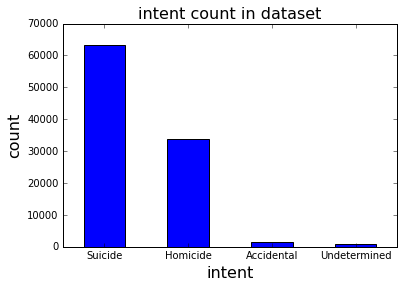

In [ ]:
df.intent.value_counts().plot(kind='bar')
plt.title('intent count in dataset',fontsize=16)
plt.xlabel('intent',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.xticks(rotation=0)
plt.show()

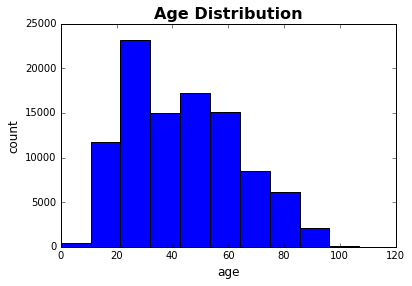

In [ ]:
plt.hist(df['age'])
plt.xlabel('age',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Age Distribution',fontsize=16,fontweight='bold')
plt.show()

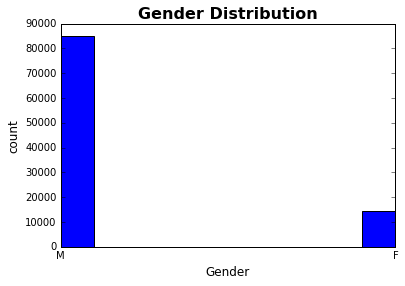

In [ ]:
plt.hist(df['sex'])
plt.xlabel('Gender',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.title('Gender Distribution',fontsize=16,fontweight='bold')
plt.show()

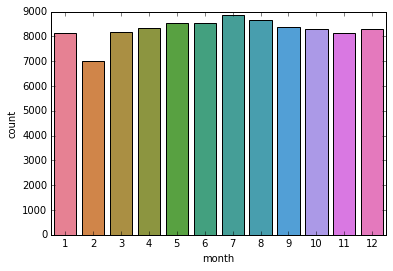

In [ ]:
# Visualize the dataset with barcharts which represent categorical data.
sns.countplot(x = 'month', data=df, palette="husl")
plt.show()

##### In graph above it shows that more death occurred in the month of July close to 9000 deaths while the least death occurred during the month of February. There should be some explanation for such plunge in gun deaths in the month of February.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of Gun Death')

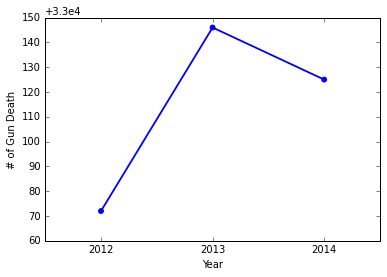

In [ ]:
from collections import Counter
y = Counter(df['year'])
value_y = []
year = []
for i in y:
    value_y.append(y[i])
    year.append(i)
sns.pointplot(year, value_y)
plt.xlabel("Year")
plt.ylabel("# of Gun Death")
  

##### In the plot above most deaths occurred during the year 2013 leading to an increase in deaths.

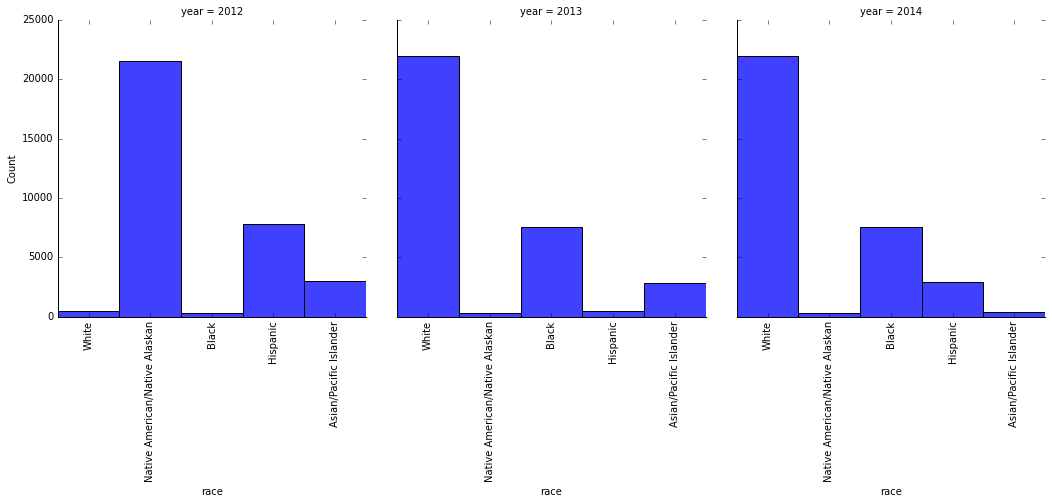

In [ ]:
g = sns.FacetGrid(df, col="year",height=5,aspect=1)
g.map(sns.histplot, "race")
g.set_xticklabels(rotation=90)

##### Death rates by race in ages in year 2012-2014

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


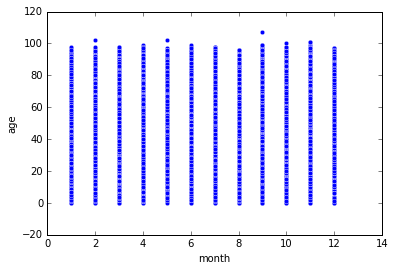

In [ ]:
sns.scatterplot('month', 'age', data=df)

### 4. Use scikit-learn logistic regression to train, test and predict a categorical target 
### variable. Use appropriate metric and interpret the meaning of the score.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#encoding intent column
df.replace({'intent':{'Suicide':0,'Undetermined':1,'Accidental':2,'Homicide':3}},inplace=True)
#encoding sex column
df.replace({'sex':{'F':0,'M':1}},inplace=True)
#encoding race" column
df.replace({'race':{'Asian/Pacific Islander':0,'White':1,'Native American/Native Alaskan':2,'Black':3,'Hispanic':4}},inplace=True)
#encoding place column
df.replace({'place':{'Home':0, 'Street':1, 'Other specified':2,'Other unspecified':3,
                     'Trade/service area':4, 'Farm':5, 'Industrial/construction':6,
       'School/instiution':7, 'Sports':8, 'Residential institution':9}},inplace=True)
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,0,0,1,34,0,100,0,4
1,2,2012,1,0,0,0,21,1,100,1,3
2,3,2012,1,0,0,1,60,1,100,2,4
3,4,2012,2,0,0,1,64,1,100,0,4
4,5,2012,2,0,0,1,31,1,100,2,2


In [ ]:
# Find the keys of our dataframe
df.keys() # this code is the smilar to df.column()

Index(['Unnamed: 0', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race',
       'hispanic', 'place', 'education'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0    int64
year          int64
month         int64
intent        int64
police        int64
sex           int64
age           int64
race          int64
hispanic      int64
place         int64
education     int64
dtype: object

##### Features and Target (a.k.a split the data and target)

In [ ]:
# Creating two arrays for the feature and target
X = df.drop(columns=["sex"]) # Choose the gender variable for our logisitic regression.
y = df['sex']

In [ ]:
X.head()

,Unnamed: 0,year,month,intent,police,age,race,hispanic,place,education
0,1,2012,1,0,0,34,0,100,0,4
1,2,2012,1,0,0,21,1,100,1,3
2,3,2012,1,0,0,60,1,100,2,4
3,4,2012,2,0,0,64,1,100,0,4
4,5,2012,2,0,0,31,1,100,2,2


In [ ]:
df.shape


(99343, 11)

In [ ]:
# Checking the type of our arrays
print('The type of X is ', type(X))
print('The type of y is ', type(y))


The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


#### Split the data into train and test

In [ ]:
# Splitting the datasets into training (75%) and testing (25%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape, y_train.shape

((74507, 10), (74507,))

In [ ]:
X_test.shape, y_test.shape

((24836, 10), (24836,))

### 5. Predict the classes of the test data. Predict the class probability of the test data


#### Instantiate, preprocess, train, and predict(test)

In [ ]:
LogReg =LogisticRegression()

In [ ]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# We fitthe training data to a logistic model
LogReg.fit(X_train, y_train)
y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [1.83431394]
Coefficients [[-0.02894305  0.00873856  0.01551502 -0.31531403  0.09240991  0.09798035
   0.37138282 -0.04468166  0.18422323 -0.20760002]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8564181027540667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3564
           1       0.86      1.00      0.92     21272

    accuracy                           0.86     24836
   macro avg       0.43      0.50      0.46     24836
weighted avg       0.73      0.86      0.79     24836



### 6. Compare one versus all and one versus one


#### Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[    0,  3564],
       [    2, 21270]])

Text(0.5, 264.2, 'Predicted label')

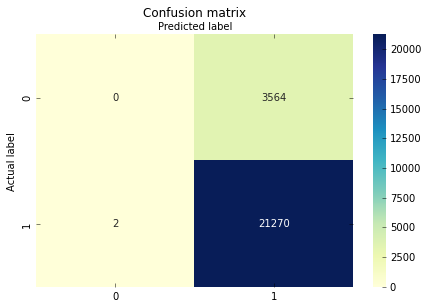

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


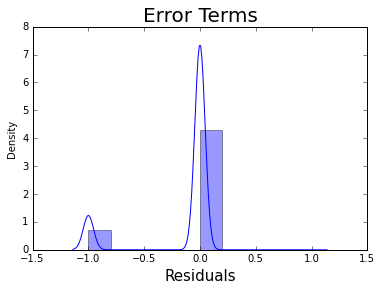

In [ ]:
residuals = y_test - y_pred
sns.distplot(residuals, bins=10)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Residuals',fontsize=15)
plt.show()

### 7. Interpret the result of the logistic regression prediction

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8564181027540667
Precision: 0.8564870741725055
Recall: 0.9999059796916134


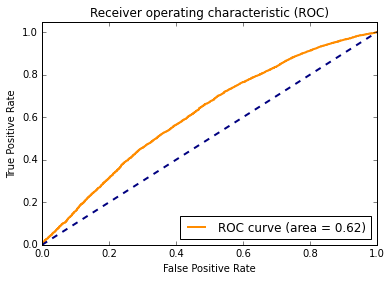

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


##### The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

##### As we can see from the plot above, we think this logistic regression model does an acceptable job of classifying the data into categories..


### Conclusion:
#####For our project3, we have a high probability and f1 score showing that the model is very accurate at predicting the sex of a victim of gun violence which is supported by our earlier graphics. Also, both the r squared fo our test data and our train dat in the sceond project is high enough to suggest the model is accurate even the train model is decently higher.

### 8. Submit a link to the Github URL and present in the class.